<a href="https://colab.research.google.com/github/karansingla11223344/ola-drivers-business-case/blob/main/ola_drivers_business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ola drivers business case

# Introduction

Ola is one of the leading ride-hailing companies in the india,connecting millions of passenders with drivers across various cities.one of the major challanges ola facing is retaining its drivers .in this project data from 2019 and 2020 to predict whether a driver will leave ola or continue.by building machine learning models and analyzing driver behaviour,we aim to help ola reduce driver attrition and improve retention strategies

In [ ]:
#MMMM-YY : Reporting Date (Monthly)
#Driver_ID : Unique id for drivers
#Age : Age of the driver
#Gender : Gender of the driver – Male : 0, Female: 1
#City : City Code of the driver
#Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
#Income : Monthly average Income of the driver
#Date Of Joining : Joining date for the driver
#LastWorkingDate : Last date of working for the driver
#Joining Designation : Designation of the driver at the time of joining
#Grade : Grade of the driver at the time of reporting
#Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
#Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           z.import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('/content/ola_driver_scaler.csv')

In [ ]:
data.head()

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
data.drop(columns='Unnamed: 0',inplace=True,axis=1)

In [ ]:
data.loc[data['Driver_ID']==2]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
data.loc[data['Driver_ID']==1]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2


In [ ]:
data['Driver_ID'].value_counts()

,count
Driver_ID,
2784,24
2753,24
2771,24
1745,24
2766,24
...,...
136,1
138,1
2710,1


In [ ]:
data.loc[data['Driver_ID']==2753]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
18857,01/01/19,2753,38.0,1.0,C11,1,144726,07/08/13,NaN,1,5,9632860,4
18858,02/01/19,2753,38.0,1.0,C11,1,144726,07/08/13,NaN,1,5,1750000,4
18859,03/01/19,2753,38.0,1.0,C11,1,144726,07/08/13,NaN,1,5,13435570,4
18860,04/01/19,2753,38.0,1.0,C11,1,144726,07/08/13,NaN,1,5,0,3
18861,05/01/19,2753,38.0,1.0,C11,1,144726,07/08/13,NaN,1,5,50000,3
18862,06/01/19,2753,38.0,1.0,C11,1,144726,07/08/13,NaN,1,5,1784820,3
18863,07/01/19,2753,38.0,1.0,C11,1,144726,07/08/13,NaN,1,5,500000,4
18864,08/01/19,2753,38.0,1.0,C11,1,144726,07/08/13,NaN,1,5,3000000,4
18865,09/01/19,2753,38.0,1.0,C11,1,144726,07/08/13,NaN,1,5,2000000,4
18866,10/01/19,2753,38.0,1.0,C11,1,144726,07/08/13,NaN,1,5,2700000,2


In [ ]:
data.loc[data['Driver_ID']==2784]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
19055,01/01/19,2784,33.0,0.0,C24,0,82815,15/10/15,NaN,2,3,1226590,3
19056,02/01/19,2784,33.0,0.0,C24,0,82815,15/10/15,NaN,2,3,203290,3
19057,03/01/19,2784,33.0,0.0,C24,0,82815,15/10/15,NaN,2,3,4495040,3
19058,04/01/19,2784,33.0,0.0,C24,0,82815,15/10/15,NaN,2,3,100450,1
19059,05/01/19,2784,33.0,0.0,C24,0,82815,15/10/15,NaN,2,3,226010,1
19060,06/01/19,2784,33.0,0.0,C24,0,82815,15/10/15,NaN,2,3,0,1
19061,07/01/19,2784,33.0,0.0,C24,0,82815,15/10/15,NaN,2,3,102770,1
19062,08/01/19,2784,33.0,0.0,C24,0,82815,15/10/15,NaN,2,3,270710,1
19063,09/01/19,2784,33.0,0.0,C24,0,82815,15/10/15,NaN,2,3,271380,1
19064,10/01/19,2784,33.0,0.0,C24,0,82815,15/10/15,NaN,2,3,990000,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [ ]:
data.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
data['Driver_ID'].nunique()

2381

In [ ]:
data['Driver_ID'].value_counts()

,count
Driver_ID,
2784,24
2753,24
2771,24
1745,24
2766,24
...,...
136,1
138,1
2710,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [ ]:
data.shape

(19104, 13)

In [ ]:
data.isna().sum(axis=0)

,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


missing values are present in the age,gender,LastWorkingDate features


In [ ]:
df=data.copy()

In [ ]:
data.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [ ]:
data.select_dtypes(include=np.number).columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

# KNN imputation

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
#fill the missing value of age column

In [ ]:
columns_for_knn=[ 'Age', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating']
data_knn=data[columns_for_knn]

In [ ]:
imputer=KNNImputer(n_neighbors=5)
data_knn_imputed=imputer.fit_transform(data_knn)


In [ ]:
data['Age']=data_knn_imputed[:,0]

In [ ]:
data.head()

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
#fill the missing value of gender column

In [ ]:
columns_for_knn_gender=['Gender','Age', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating']
data_knn_g=data[columns_for_knn_gender]

In [ ]:
imputer=KNNImputer(n_neighbors=5)
data_knn_imputed_g=imputer.fit_transform(data_knn_g)


In [ ]:
data['Gender']=data_knn_imputed_g[:,0].round()

In [ ]:
data['Gender'].value_counts()

,count
Gender,
0.0,11100
1.0,8004


# Feature engineering

In [ ]:
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], errors='coerce')
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], errors='coerce')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], errors='coerce')

/tmp/ipython-input-490612230.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], errors='coerce')
/tmp/ipython-input-490612230.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], errors='coerce')
/tmp/ipython-input-490612230.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], errors='coerce')


In [ ]:
#make new features based on date of joining to capture long trends,quartely trends and seasonality
df['joining_year']=df['Dateofjoining'].dt.year
df['joining_month']=df['Dateofjoining'].dt.month
df['joining_quarter']=df['Dateofjoining'].dt.quarter.astype(str)

In [ ]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,joining_year,joining_month,joining_quarter
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,2018,12,4
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2018,12,4
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,2018,12,4
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,2020,11,4
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,2020,11,4


In [ ]:
def get_season(month):
  if month in [12,1,2]:
    return 'Winter'
  elif month in [3,4,5]:
    return 'Spring'
  elif month in [6,7,8]:
    return 'Summer'
  else :
    return 'Fall'

In [ ]:
#this feature tells about seasonality
df['joining_season']=df['joining_month'].apply(get_season)

In [ ]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,joining_year,joining_month,joining_quarter,joining_season
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,2018,12,4,Winter
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2018,12,4,Winter
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,2018,12,4,Winter
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,2020,11,4,Fall
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,2020,11,4,Fall


In [ ]:
#for recent ratings
df['quarter']=df['MMM-YY'].dt.quarter
df=df.sort_values(by=['Driver_ID','quarter'])
df['last_rating']=df.groupby('Driver_ID')['Quarterly Rating'].transform('last')


In [ ]:
#due to fluctuation in quartely rating so much take the std of quartelt rating
df['rating_std']=df.groupby('Driver_ID')['Quarterly Rating'].transform('std')


In [ ]:
df['rating_std'].isna().sum(axis=0)

np.int64(181)

In [ ]:
df['rating_std']=df['rating_std'].fillna(0)

In [ ]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'joining_year',
       'joining_month', 'joining_quarter', 'joining_season', 'quarter',
       'last_rating', 'rating_std'],
      dtype='object')

In [ ]:
#relative income
df['income_by_designation']=df.groupby('Joining Designation')['Income'].transform('mean')
df['relative_income']=df['Income']/df['income_by_designation']
df['high_perf_low_pay']=((df['last_rating']>=3)&(df['relative_income']<0.9)).astype(int)

In [ ]:
#grouped the drivers in single row rather than multiple rows

In [ ]:
df_group=df.groupby('Driver_ID')[['MMM-YY', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation','joining_season',
       'Grade','last_rating','high_perf_low_pay','rating_std']].max().reset_index()

In [ ]:
df_group.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,joining_season,Grade,last_rating,high_perf_low_pay,rating_std
0,1,2019-03-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,Winter,1,2,0,0.000000
1,2,2020-12-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,Fall,2,1,0,0.000000
2,4,2020-04-01,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,Winter,2,1,0,0.000000
3,5,2019-03-01,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,Winter,1,1,0,0.000000
4,6,2020-12-01,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,Summer,3,2,0,0.547723


In [ ]:
df_group['high_perf_low_pay'].value_counts()

,count
high_perf_low_pay,
0,2249
1,132


In [ ]:
#create target column based on drivers who left or not

In [ ]:
df_group['Target']=df_group['LastWorkingDate'].apply(lambda x : 0 if pd.isnull(x)   else 1)

In [ ]:
#for references we choose MAx of last working date for drivers which are still in the company
df_group['LastWorkingDate']=df['LastWorkingDate'].fillna(df_group['LastWorkingDate'].max())

In [ ]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Driver_ID            2381 non-null   int64         
 1   MMM-YY               2381 non-null   datetime64[ns]
 2   Age                  2381 non-null   float64       
 3   Gender               2381 non-null   float64       
 4   City                 2381 non-null   object        
 5   Education_Level      2381 non-null   int64         
 6   Income               2381 non-null   int64         
 7   Dateofjoining        2381 non-null   datetime64[ns]
 8   LastWorkingDate      2381 non-null   datetime64[ns]
 9   Joining Designation  2381 non-null   int64         
 10  joining_season       2381 non-null   object        
 11  Grade                2381 non-null   int64         
 12  last_rating          2381 non-null   int64         
 13  high_perf_low_pay    2381 non-nul

In [ ]:
df_group.shape

(2381, 16)

In [ ]:
df_business=df.groupby('Driver_ID')[['Total Business Value', 'Quarterly Rating']].mean().reset_index()

In [ ]:
df_business.head()

,Driver_ID,Total Business Value,Quarterly Rating
0,1,571860.0,2.0
1,2,0.0,1.0
2,4,70000.0,1.0
3,5,40120.0,1.0
4,6,253000.0,1.6


In [ ]:
#merge the two dataframe (df_group and df_business)

In [ ]:
df_merge=df_group.merge(df_business,on='Driver_ID',how='inner')

In [ ]:
df_merge

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,joining_season,Grade,last_rating,high_perf_low_pay,rating_std,Target,Total Business Value,Quarterly Rating
0,1,2019-03-01,28.0,0.0,C23,2,57387,2018-12-24,2020-12-28,1,Winter,1,2,0,0.000000,1,571860.000000,2.000000
1,2,2020-12-01,31.0,0.0,C7,2,67016,2020-11-06,2020-12-28,2,Fall,2,1,0,0.000000,0,0.000000,1.000000
2,4,2020-04-01,43.0,0.0,C13,2,65603,2019-12-07,2019-03-11,2,Winter,2,1,0,0.000000,1,70000.000000,1.000000
3,5,2019-03-01,29.0,0.0,C9,0,46368,2019-01-09,2020-12-28,1,Winter,1,1,0,0.000000,1,40120.000000,1.000000
4,6,2020-12-01,31.0,1.0,C11,1,78728,2020-07-31,2020-12-28,3,Summer,3,2,0,0.547723,0,253000.000000,1.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2020-12-01,34.0,0.0,C24,0,82815,2015-10-15,2020-12-28,2,Fall,3,4,0,1.013496,0,906200.833333,2.625000
2377,2785,2020-10-01,34.0,1.0,C9,0,12105,2020-08-28,2020-12-28,1,Summer,1,1,0,0.000000,1,0.000000,1.000000
2378,2786,2019-09-01,45.0,0.0,C19,0,35370,2018-07-31,2020-12-28,2,Summer,2,1,0,0.500000,1,312787.777778,1.666667
2379,2787,2019-06-01,28.0,1.0,C20,2,69498,2018-07-21,2020-12-28,1,Summer,1,1,0,0.547723,1,162971.666667,1.500000


In [ ]:
df_merge.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,joining_season,Grade,last_rating,high_perf_low_pay,rating_std,Target,Total Business Value,Quarterly Rating
0,1,2019-03-01,28.0,0.0,C23,2,57387,2018-12-24,2020-12-28,1,Winter,1,2,0,0.000000,1,571860.0,2.0
1,2,2020-12-01,31.0,0.0,C7,2,67016,2020-11-06,2020-12-28,2,Fall,2,1,0,0.000000,0,0.0,1.0
2,4,2020-04-01,43.0,0.0,C13,2,65603,2019-12-07,2019-03-11,2,Winter,2,1,0,0.000000,1,70000.0,1.0
3,5,2019-03-01,29.0,0.0,C9,0,46368,2019-01-09,2020-12-28,1,Winter,1,1,0,0.000000,1,40120.0,1.0
4,6,2020-12-01,31.0,1.0,C11,1,78728,2020-07-31,2020-12-28,3,Summer,3,2,0,0.547723,0,253000.0,1.6


In [ ]:
#create a new feature(worked_days) to find how many days spend by drivers in company generally

In [ ]:
df_merge['worked_days']=(df_merge['MMM-YY'] -  df_merge['Dateofjoining'])


In [ ]:
df_merge['worked_days'] = df_merge['worked_days'].dt.days

In [ ]:
df_merge.columns

Index(['Driver_ID', 'MMM-YY', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'joining_season', 'Grade', 'last_rating', 'high_perf_low_pay',
       'rating_std', 'Target', 'Total Business Value', 'Quarterly Rating',
       'worked_days'],
      dtype='object')

In [ ]:
df_merge['value_gap']=df_merge['Total Business Value']-1.2*df_merge['Income']

In [ ]:
df_merge.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,joining_season,Grade,last_rating,high_perf_low_pay,rating_std,Target,Total Business Value,Quarterly Rating,worked_days,value_gap
0,1,2019-03-01,28.0,0.0,C23,2,57387,2018-12-24,2020-12-28,1,Winter,1,2,0,0.000000,1,571860.0,2.0,67,502995.6
1,2,2020-12-01,31.0,0.0,C7,2,67016,2020-11-06,2020-12-28,2,Fall,2,1,0,0.000000,0,0.0,1.0,25,-80419.2
2,4,2020-04-01,43.0,0.0,C13,2,65603,2019-12-07,2019-03-11,2,Winter,2,1,0,0.000000,1,70000.0,1.0,116,-8723.6
3,5,2019-03-01,29.0,0.0,C9,0,46368,2019-01-09,2020-12-28,1,Winter,1,1,0,0.000000,1,40120.0,1.0,51,-15521.6
4,6,2020-12-01,31.0,1.0,C11,1,78728,2020-07-31,2020-12-28,3,Summer,3,2,0,0.547723,0,253000.0,1.6,123,158526.4


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   MMM-YY                2381 non-null   datetime64[ns]
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   int64         
 6   Income                2381 non-null   int64         
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   LastWorkingDate       2381 non-null   datetime64[ns]
 9   Joining Designation   2381 non-null   int64         
 10  joining_season        2381 non-null   object        
 11  Grade                 2381 non-null   int64         
 12  last_rating           2381 non-null   int64         
 13  high_perf_low_pay 

In [ ]:
df_merge.shape

(2381, 20)

In [ ]:
df_merge.describe()

,Driver_ID,MMM-YY,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,last_rating,high_perf_low_pay,rating_std,Target,Total Business Value,Quarterly Rating,worked_days,value_gap
count,2381.000000,2381,2381.000000,2381.000000,2381.00000,2381.000000,2381,2381,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2.381000e+03
mean,1397.559009,2020-03-31 15:04:09.475010560,33.663167,0.410332,1.00756,59336.159597,2019-02-08 07:14:50.550189056,2020-11-23 12:07:33.590928128,1.820244,2.097018,1.48845,0.055439,0.332000,0.678706,3.120854e+05,1.566304,417.325913,2.408820e+05
min,1.000000,2019-01-01 00:00:00,21.000000,0.000000,0.00000,10747.000000,2013-04-01 00:00:00,2019-01-05 00:00:00,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,-1.979329e+05,1.000000,-27.000000,-2.614297e+05
25%,695.000000,2019-09-01 00:00:00,29.000000,0.000000,0.00000,39104.000000,2018-06-29 00:00:00,2020-12-28 00:00:00,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,85.000000,-4.520040e+04
50%,1400.000000,2020-06-01 00:00:00,33.000000,0.000000,1.00000,55315.000000,2019-07-21 00:00:00,2020-12-28 00:00:00,2.000000,2.000000,1.00000,0.000000,0.000000,1.000000,1.506244e+05,1.000000,173.000000,8.898366e+04
75%,2100.000000,2020-12-01 00:00:00,37.000000,1.000000,2.00000,75986.000000,2020-05-02 00:00:00,2020-12-28 00:00:00,2.000000,3.000000,2.00000,0.000000,0.547723,1.000000,4.294988e+05,2.000000,460.000000,3.537180e+05
max,2788.000000,2020-12-01 00:00:00,58.000000,1.000000,2.00000,188418.000000,2020-12-28 00:00:00,2020-12-28 00:00:00,5.000000,5.000000,4.00000,1.000000,1.643168,1.000000,3.972128e+06,4.000000,2801.000000,3.864059e+06
std,806.161628,NaN,5.983375,0.491997,0.81629,28383.012146,NaN,NaN,0.841433,0.941702,0.84190,0.228883,0.402122,0.467071,4.495705e+05,0.719652,565.032335,4.374561e+05


In [ ]:
df_merge.columns

Index(['Driver_ID', 'MMM-YY', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'joining_season', 'Grade', 'last_rating', 'high_perf_low_pay',
       'rating_std', 'Target', 'Total Business Value', 'Quarterly Rating',
       'worked_days', 'value_gap'],
      dtype='object')

In [ ]:
df_merge.drop(columns=['Driver_ID', 'MMM-YY',  'Dateofjoining', 'LastWorkingDate'],inplace=True,axis=1)

In [ ]:
df_merge.head()

,Age,Gender,City,Education_Level,Income,Joining Designation,joining_season,Grade,last_rating,high_perf_low_pay,rating_std,Target,Total Business Value,Quarterly Rating,worked_days,value_gap
0,28.0,0.0,C23,2,57387,1,Winter,1,2,0,0.000000,1,571860.0,2.0,67,502995.6
1,31.0,0.0,C7,2,67016,2,Fall,2,1,0,0.000000,0,0.0,1.0,25,-80419.2
2,43.0,0.0,C13,2,65603,2,Winter,2,1,0,0.000000,1,70000.0,1.0,116,-8723.6
3,29.0,0.0,C9,0,46368,1,Winter,1,1,0,0.000000,1,40120.0,1.0,51,-15521.6
4,31.0,1.0,C11,1,78728,3,Summer,3,2,0,0.547723,0,253000.0,1.6,123,158526.4


In [ ]:
df_merge.isna().sum(axis=0)

,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Joining Designation,0
joining_season,0
Grade,0
last_rating,0
high_perf_low_pay,0


Treatment of outliers

In [ ]:
numerial_colu=df_merge.select_dtypes(include=np.number).columns
numerial_colu

Index(['Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'last_rating', 'high_perf_low_pay', 'rating_std', 'Target',
       'Total Business Value', 'Quarterly Rating', 'worked_days', 'value_gap'],
      dtype='object')

In [ ]:
numerial_columss=['Age', 'Income', 'last_rating',
       'high_perf_low_pay', 'rating_std', 'Total Business Value',
       'Quarterly Rating', 'worked_days', 'value_gap']

In [ ]:
for col in numerial_columss:
  Q1=df_merge[col].quantile(0.25)
  Q3=df_merge[col].quantile(0.75)
  IQR=Q3-Q1
  upper_bound=Q3 + 1.5*IQR
  lower_bound=Q1 - 1.5*IQR
  df_merge[col]=df_merge[col].apply(lambda x : lower_bound if x < lower_bound else (upper_bound if x> upper_bound else x ))

In [ ]:
df_merge.head()

,Age,Gender,City,Education_Level,Income,Joining Designation,joining_season,Grade,last_rating,high_perf_low_pay,rating_std,Target,Total Business Value,Quarterly Rating,worked_days,value_gap
0,28.0,0.0,C23,2,57387.0,1,Winter,1,2.0,0.0,0.000000,1,571860.0,2.0,67.0,502995.6
1,31.0,0.0,C7,2,67016.0,2,Fall,2,1.0,0.0,0.000000,0,0.0,1.0,25.0,-80419.2
2,43.0,0.0,C13,2,65603.0,2,Winter,2,1.0,0.0,0.000000,1,70000.0,1.0,116.0,-8723.6
3,29.0,0.0,C9,0,46368.0,1,Winter,1,1.0,0.0,0.000000,1,40120.0,1.0,51.0,-15521.6
4,31.0,1.0,C11,1,78728.0,3,Summer,3,2.0,0.0,0.547723,0,253000.0,1.6,123.0,158526.4


<Axes: xlabel='Target', ylabel='Age'>

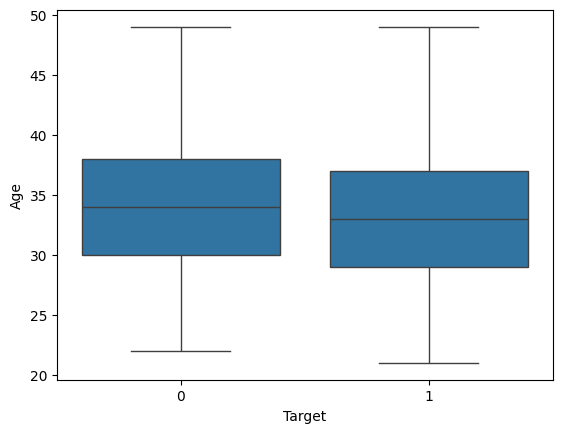

In [ ]:
sns.boxplot(x='Target',y='Age',data=df_merge)

<Axes: xlabel='Target', ylabel='Income'>

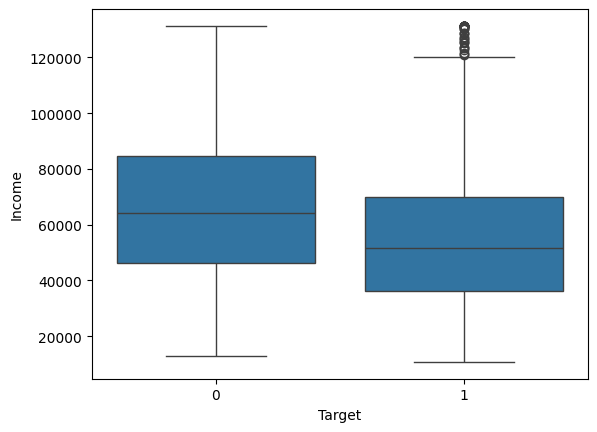

In [ ]:
sns.boxplot(x='Target',y='Income',data=df_merge)

<Axes: xlabel='Target', ylabel='Total Business Value'>

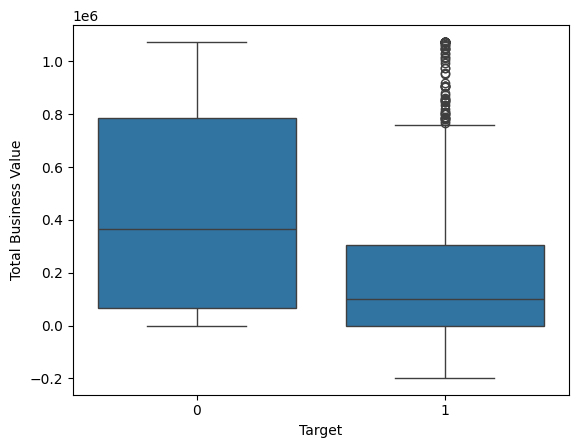

In [ ]:
sns.boxplot(x='Target',y='Total Business Value',data=df_merge)

<Axes: xlabel='Target', ylabel='worked_days'>

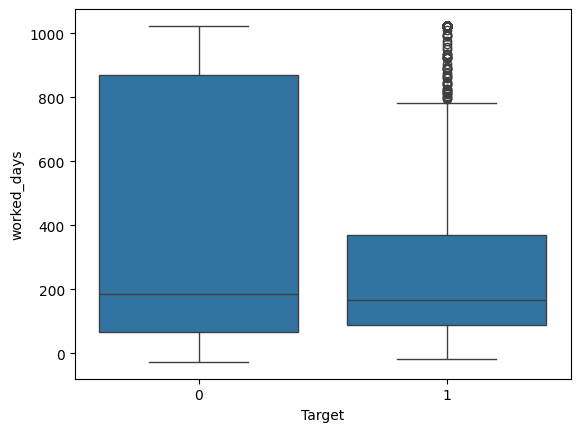

In [ ]:
sns.boxplot(x='Target',y='worked_days',data=df_merge)

In [ ]:
df_merge.head()

,Age,Gender,City,Education_Level,Income,Joining Designation,joining_season,Grade,last_rating,high_perf_low_pay,rating_std,Target,Total Business Value,Quarterly Rating,worked_days,value_gap
0,28.0,0.0,C23,2,57387.0,1,Winter,1,2.0,0.0,0.000000,1,571860.0,2.0,67.0,502995.6
1,31.0,0.0,C7,2,67016.0,2,Fall,2,1.0,0.0,0.000000,0,0.0,1.0,25.0,-80419.2
2,43.0,0.0,C13,2,65603.0,2,Winter,2,1.0,0.0,0.000000,1,70000.0,1.0,116.0,-8723.6
3,29.0,0.0,C9,0,46368.0,1,Winter,1,1.0,0.0,0.000000,1,40120.0,1.0,51.0,-15521.6
4,31.0,1.0,C11,1,78728.0,3,Summer,3,2.0,0.0,0.547723,0,253000.0,1.6,123.0,158526.4


# univariate and bivariate analysis

In [ ]:
df_copy=df_merge.copy()

In [ ]:
df_copy.select_dtypes(include=['int64','float64']).columns

Index(['Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'last_rating', 'high_perf_low_pay', 'rating_std', 'Target',
       'Total Business Value', 'Quarterly Rating', 'worked_days', 'value_gap'],
      dtype='object')

In [ ]:
cols=['Age', 'Income',
        'last_rating',  'rating_std',
       'Total Business Value', 'Quarterly Rating', 'worked_days', 'value_gap',
       ]

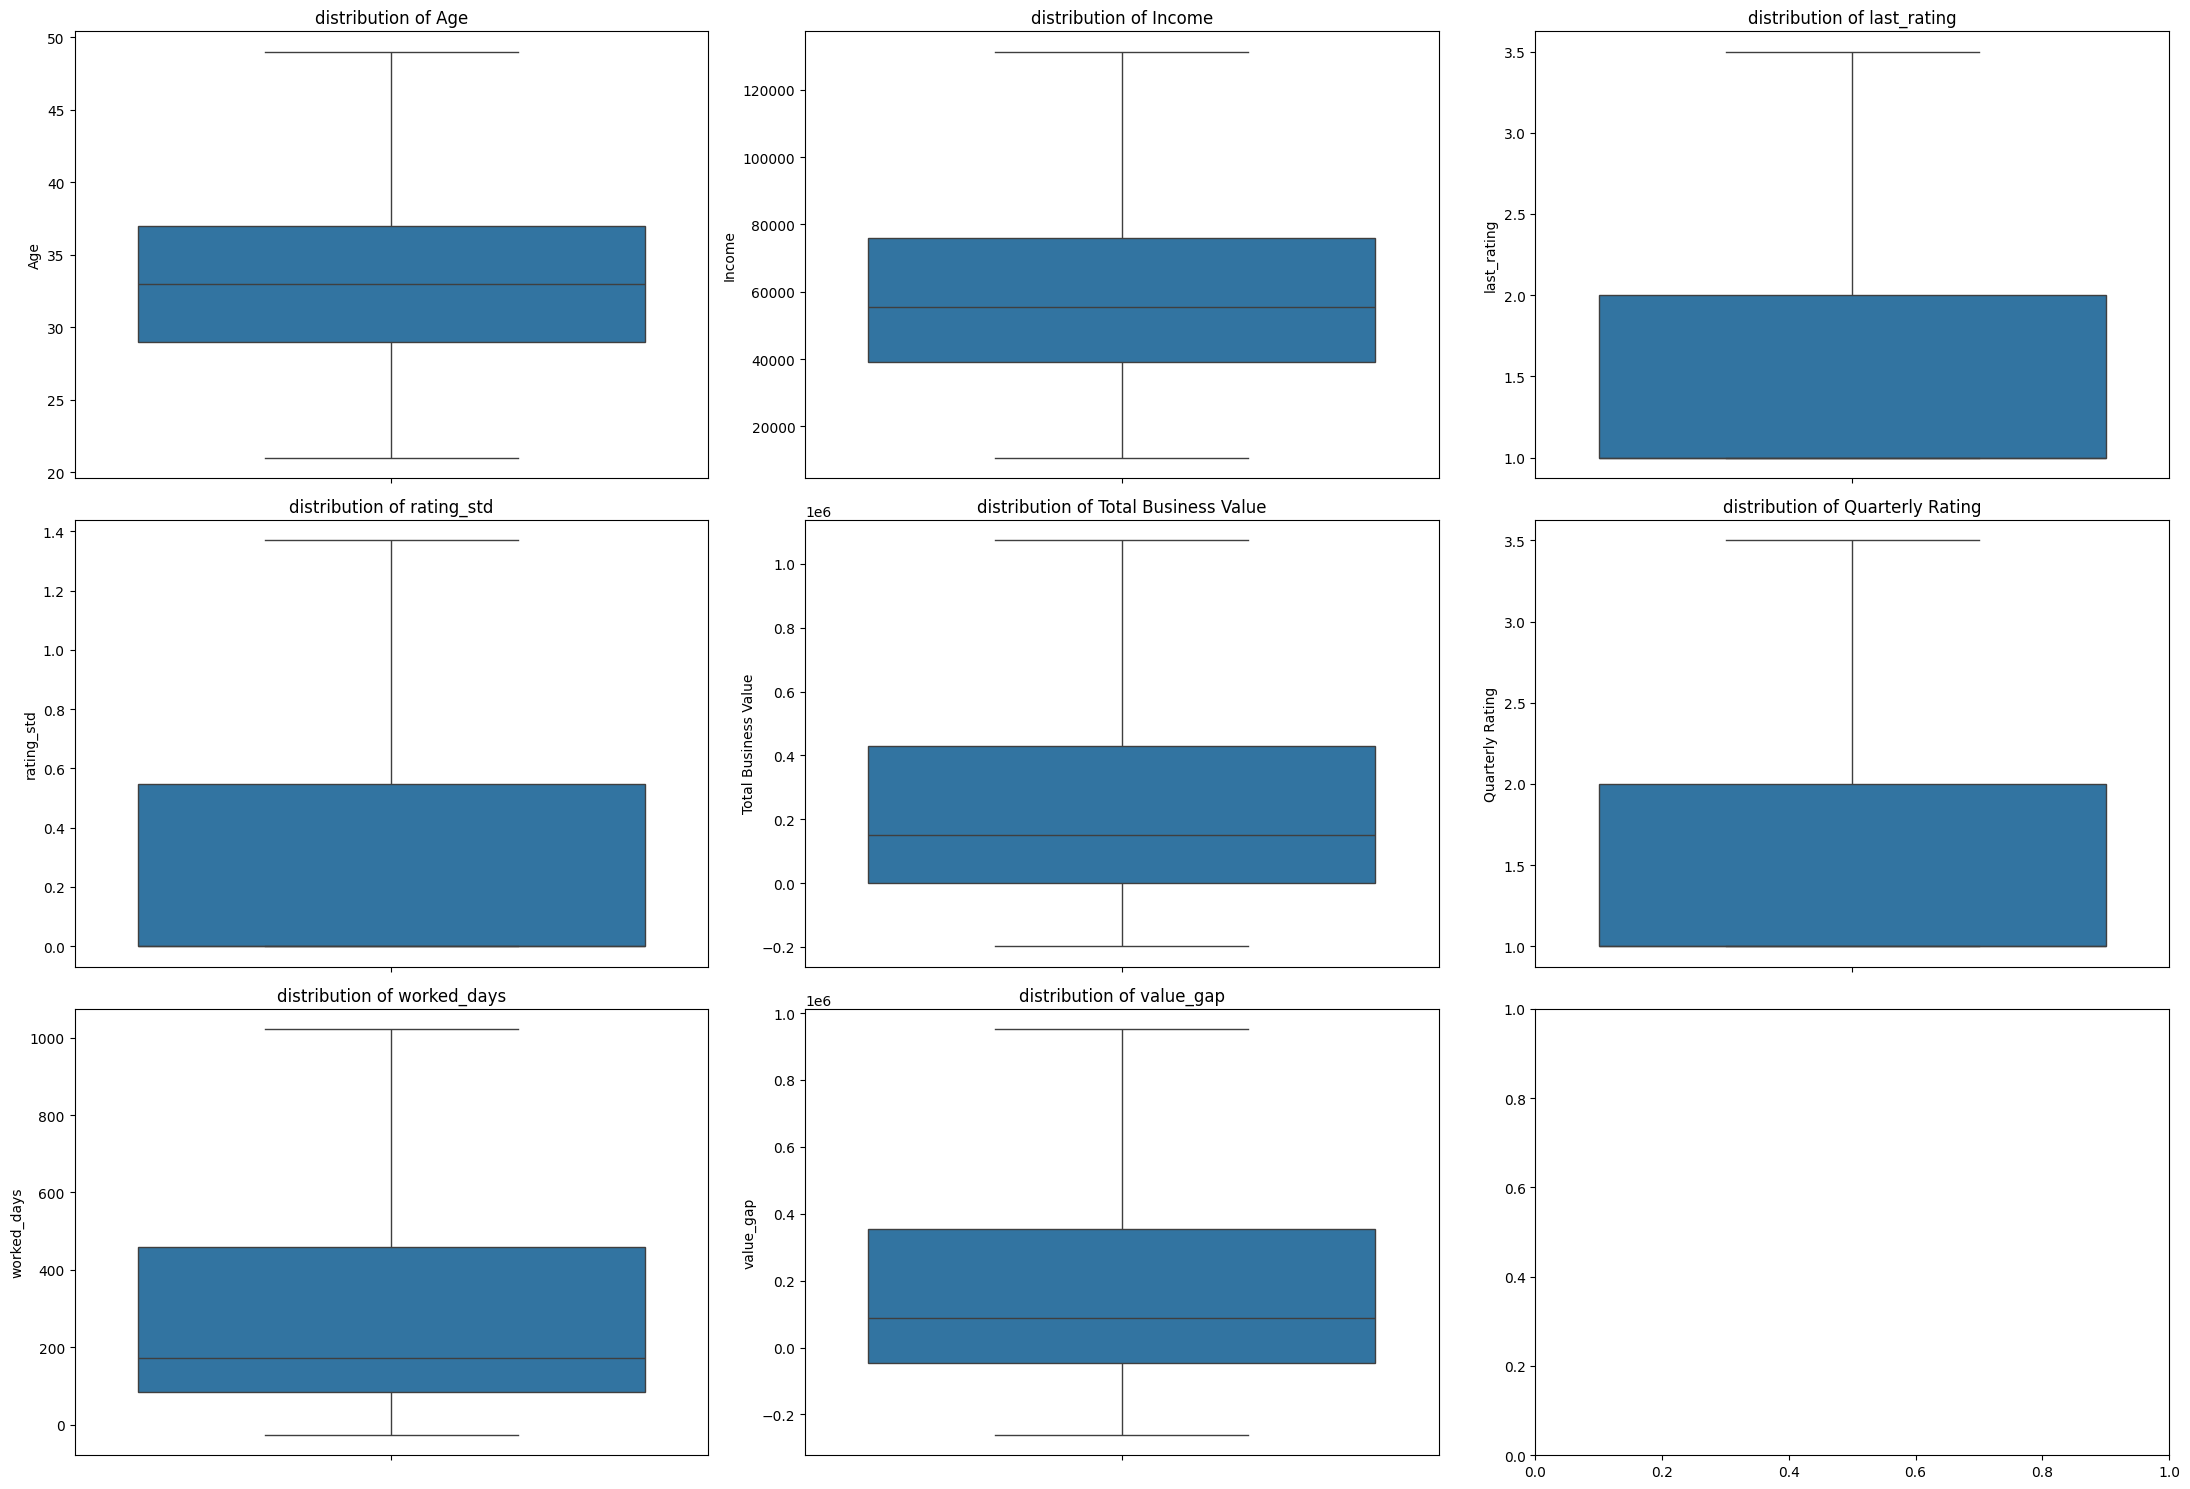

In [ ]:
#distribution plot of numerical features
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(22,15))
ax=ax.flatten()
for i,col in enumerate(cols):
    sns.boxplot(data=df_copy,y=col,ax=ax[i])
    ax[i].set_title(f'distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
for col in cols:
  Q1=df_copy[col].quantile(0.25)
  Q3=df_copy[col].quantile(0.75)
  print(f'iqr range of {col} is {Q1}-{Q3}')


iqr range of Age is 29.0-37.0
iqr range of Income is 39104.0-75986.0
iqr range of last_rating is 1.0-2.0
iqr range of rating_std is 0.0-0.5477225575051662
iqr range of Total Business Value is 0.0-429498.75
iqr range of Quarterly Rating is 1.0-2.0
iqr range of worked_days is 85.0-460.0
iqr range of value_gap is -45200.4-353718.0


observation

1.age has a iqr of (29-37) years indicates a narrow age distribution around early adulthood to middle age

2.income shows a wide iqr range between rs(39104.0-75986.0)
suggesting variation in income levels within the middle 50% of the data

3.last rating has a iqr (1-2) suggest most individuals are rating within this narrow range

4. rating std has a iqr of 0.0-0.547 indicating low variability in rating standard deviation

5. total business value varies widely (0.0-429498.75) showing a high spread in business-related value

6.quartely rating has a consistent iqr(1-2) similar to last rating

7.worked days ranges from (85 - 460)days which shows large variability in workdays reported

8.value gap ranges from -45200 to 353710 indicating a substantial difference between the lowest and highest values in the features

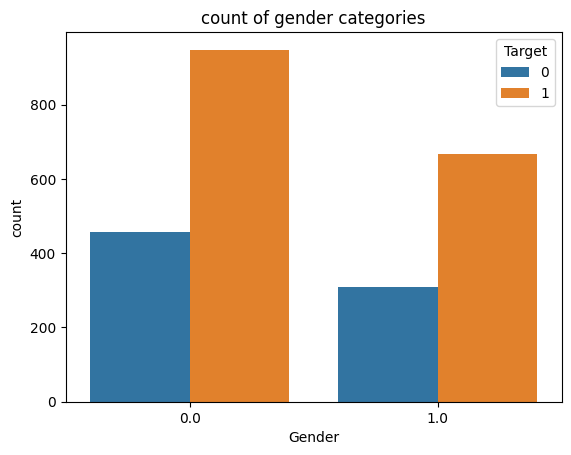

In [ ]:
#count of gender
sns.countplot(x='Gender',data=df_copy,hue='Target')
plt.title('count of gender categories')
plt.show()

Observations

58.9% drivers are males and 41.0% drivers are female

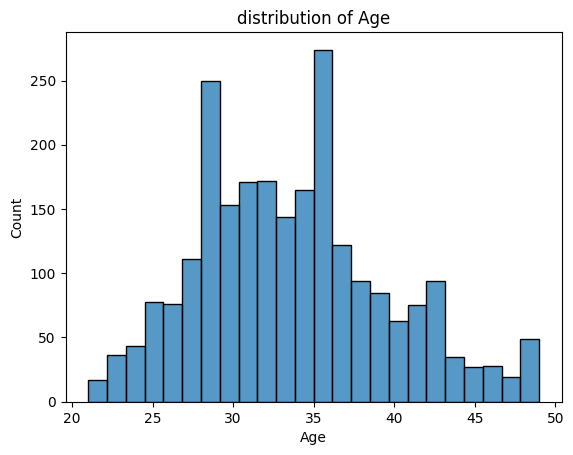

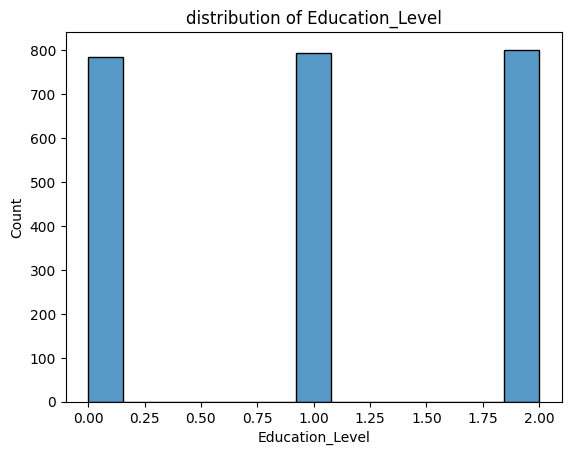

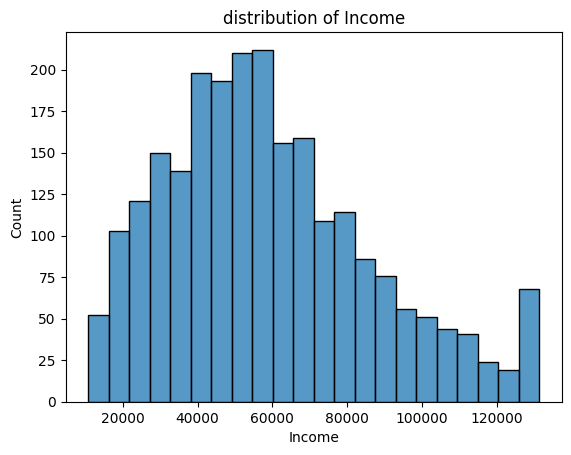

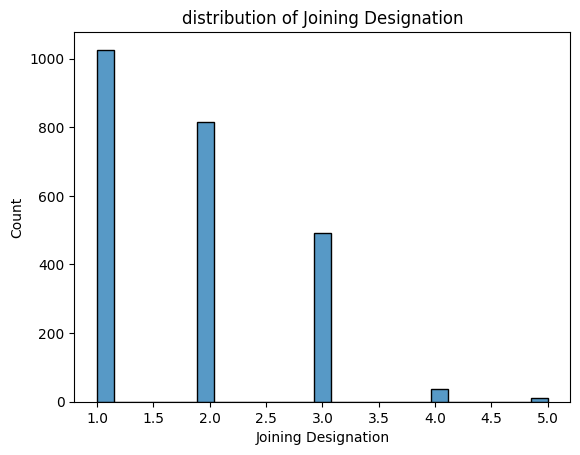

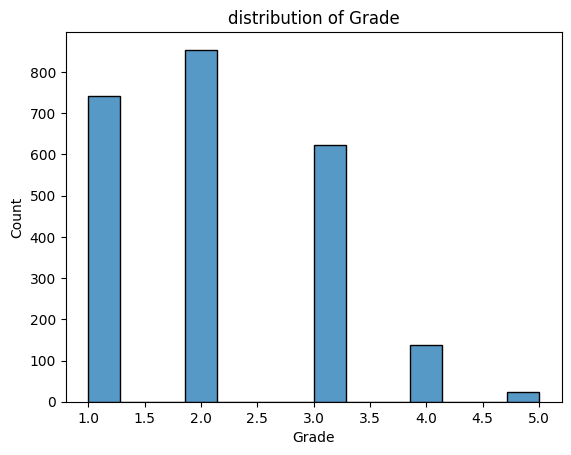

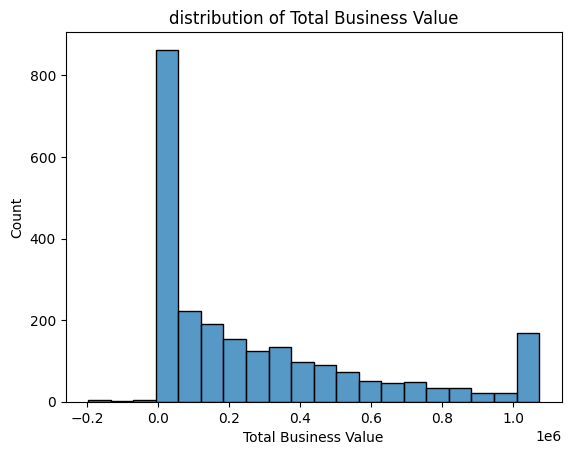

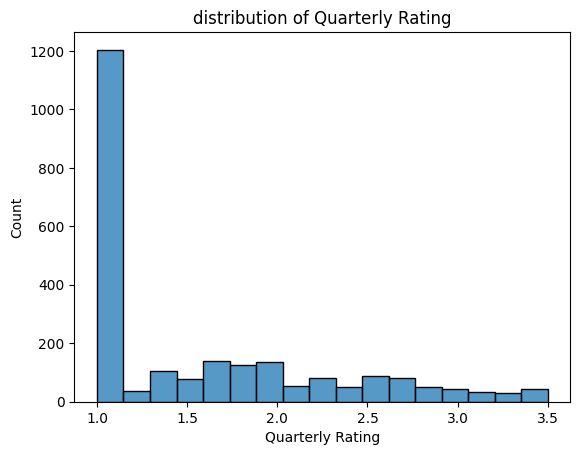

In [ ]:
for i in  [ 'Age', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating']:
       sns.histplot(data=df_copy,x=i)
       plt.title(f'distribution of {i}')
       plt.show()

In [ ]:
df_copy.head()

,Age,Gender,City,Education_Level,Income,Joining Designation,joining_season,Grade,last_rating,high_perf_low_pay,rating_std,Target,Total Business Value,Quarterly Rating,worked_days,value_gap
0,28.0,0.0,C23,2,57387.0,1,Winter,1,2.0,0.0,0.000000,1,571860.0,2.0,67.0,502995.6
1,31.0,0.0,C7,2,67016.0,2,Fall,2,1.0,0.0,0.000000,0,0.0,1.0,25.0,-80419.2
2,43.0,0.0,C13,2,65603.0,2,Winter,2,1.0,0.0,0.000000,1,70000.0,1.0,116.0,-8723.6
3,29.0,0.0,C9,0,46368.0,1,Winter,1,1.0,0.0,0.000000,1,40120.0,1.0,51.0,-15521.6
4,31.0,1.0,C11,1,78728.0,3,Summer,3,2.0,0.0,0.547723,0,253000.0,1.6,123.0,158526.4


In [ ]:
df_agee=df_copy[df_copy['Target']==1]['Age']

<Axes: ylabel='Age'>

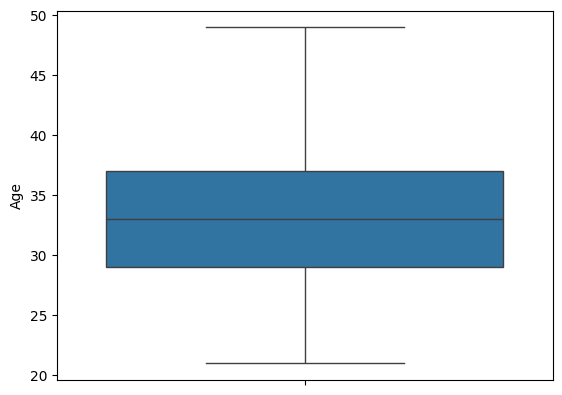

In [ ]:
sns.boxplot(data=df_agee)

In [ ]:

df_copy['age_bins']=pd.cut(df_copy['Age'],bins=(0,20,30,40,float('inf')),labels=('0-20','20-30','30-40','>40'))

Impact of age on drivers churn

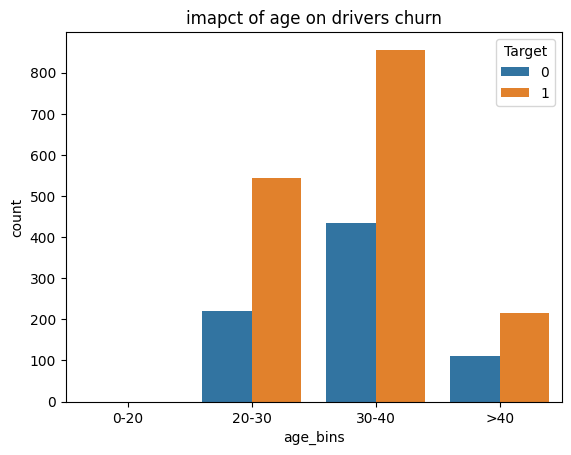

In [ ]:
sns.countplot(data=df_copy,x='age_bins',hue='Target')
plt.title('imapct of age on drivers churn')
plt.show()

observation

ratio of left out to not left out of drivers from company is same .so age featues does not look good features to see drivers churn

<Axes: ylabel='Income'>

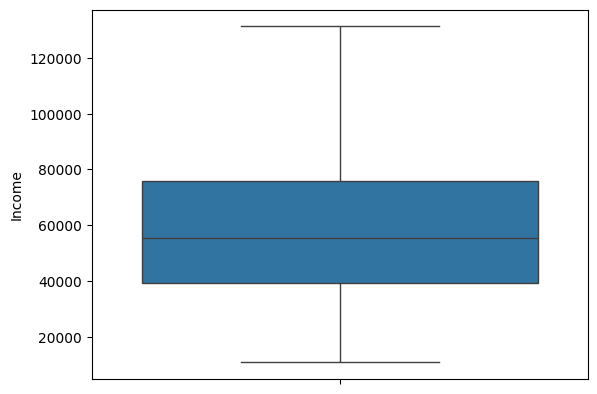

In [ ]:
sns.boxplot(df_copy,y='Income')

In [ ]:
df_copy['income_bins']=pd.cut(df_copy['Income'],bins=(0,30000,50000,70000,float('inf')),labels=('low','mid','high','very_high'))

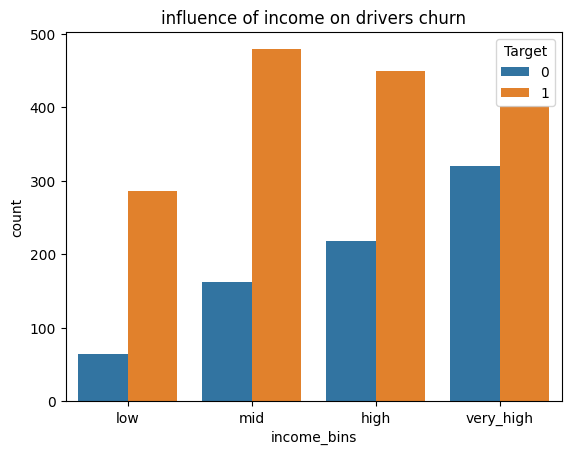

In [ ]:
sns.countplot(data=df_copy,x='income_bins',hue='Target')
plt.title("influence of income on drivers churn")
plt.show()

Observations

as income increases the ratio of drivers who left to those who stayed decreases.This indicate that drivers with lower incomes are likely to leave the company while higher-income drivers show a lower likelihood of churn



In [ ]:
df_copy.columns

Index(['Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Joining Designation', 'joining_season', 'Grade', 'last_rating',
       'high_perf_low_pay', 'rating_std', 'Target', 'Total Business Value',
       'Quarterly Rating', 'worked_days', 'value_gap', 'age_bins',
       'income_bins'],
      dtype='object')

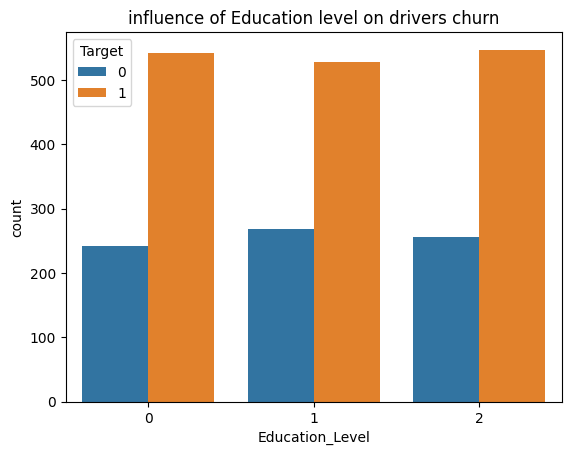

In [ ]:
sns.countplot(data=df_copy,x='Education_Level',hue='Target')
plt.title("influence of Education level on drivers churn")
plt.show()

Observation

ratio of left to stay of drivers from company based on education level is same

means education is not important features for drivers churn from company's perceptive



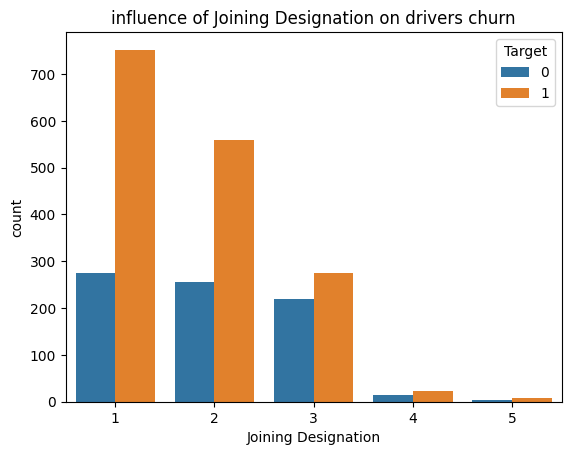

In [ ]:
sns.countplot(data=df_copy,x='Joining Designation',hue='Target')
plt.title("influence of Joining Designation on drivers churn")
plt.show()

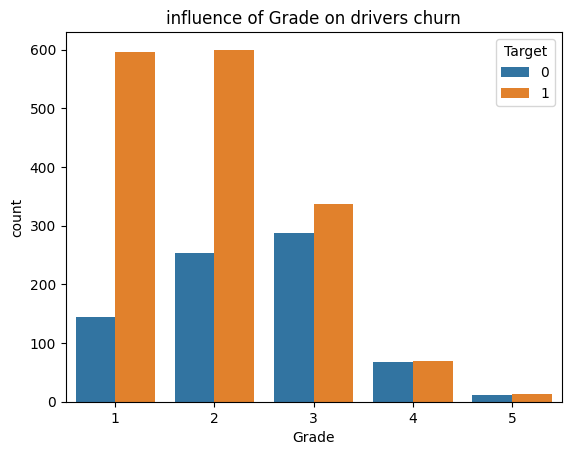

In [ ]:
sns.countplot(data=df_copy,x='Grade',hue='Target')
plt.title("influence of Grade on drivers churn")
plt.show()

In [ ]:
df_copy.head()

,Age,Gender,City,Education_Level,Income,Joining Designation,joining_season,Grade,last_rating,high_perf_low_pay,rating_std,Target,Total Business Value,Quarterly Rating,worked_days,value_gap,age_bins,income_bins
0,28.0,0.0,C23,2,57387.0,1,Winter,1,2.0,0.0,0.000000,1,571860.0,2.0,67.0,502995.6,20-30,high
1,31.0,0.0,C7,2,67016.0,2,Fall,2,1.0,0.0,0.000000,0,0.0,1.0,25.0,-80419.2,30-40,high
2,43.0,0.0,C13,2,65603.0,2,Winter,2,1.0,0.0,0.000000,1,70000.0,1.0,116.0,-8723.6,>40,high
3,29.0,0.0,C9,0,46368.0,1,Winter,1,1.0,0.0,0.000000,1,40120.0,1.0,51.0,-15521.6,20-30,mid
4,31.0,1.0,C11,1,78728.0,3,Summer,3,2.0,0.0,0.547723,0,253000.0,1.6,123.0,158526.4,30-40,very_high


In [ ]:
df_copy['business_value_per_income']=df_copy['Total Business Value']/df_copy['Income']

<Axes: ylabel='business_value_per_income'>

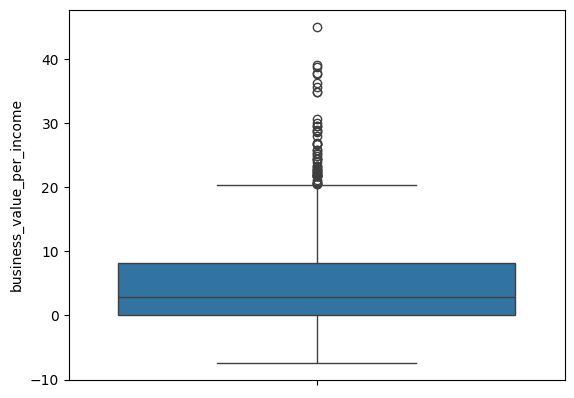

In [ ]:
sns.boxplot(data=df_copy,y='business_value_per_income')

In [ ]:
df_copy['average_per_income_bins']=pd.cut(df_copy['business_value_per_income'],bins=(-10,0,1,4,float('inf')),labels=('negative','low','medium','high'))

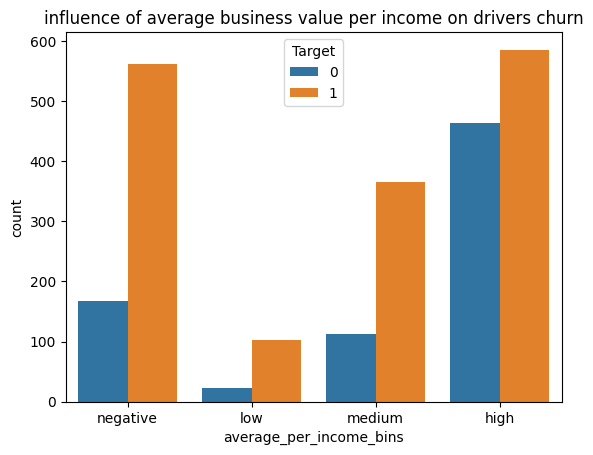

In [ ]:
sns.countplot(data=df_copy,x='average_per_income_bins',hue='Target')
plt.title("influence of average business value per income on drivers churn")
plt.show()

observation

ratio of left to stay is high when average business value per income is less and negative ,it indicates that those drivers which provide good profit to company is satisfied with company's offers

In [ ]:
df_copy.shape

(2381, 20)

<Axes: xlabel='Target', ylabel='count'>

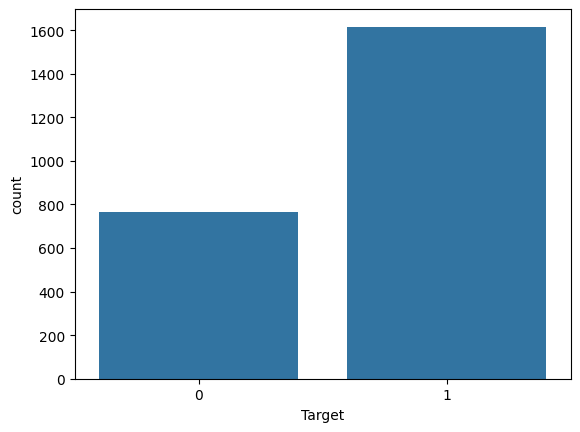

In [ ]:
sns.countplot(data=df_copy,x='Target')

In [ ]:
df_copy_minus_date=df_copy[df_copy['Target']==1]
df_copy_minus_date

,Age,Gender,City,Education_Level,Income,Joining Designation,joining_season,Grade,last_rating,high_perf_low_pay,rating_std,Target,Total Business Value,Quarterly Rating,worked_days,value_gap,age_bins,income_bins,business_value_per_income,average_per_income_bins
0,28.0,0.0,C23,2,57387.0,1,Winter,1,2.0,0.0,0.000000,1,571860.000000,2.000000,67.0,502995.600000,20-30,high,9.964975,high
2,43.0,0.0,C13,2,65603.0,2,Winter,2,1.0,0.0,0.000000,1,70000.000000,1.000000,116.0,-8723.600000,>40,high,1.067024,medium
3,29.0,0.0,C9,0,46368.0,1,Winter,1,1.0,0.0,0.000000,1,40120.000000,1.000000,51.0,-15521.600000,20-30,mid,0.865252,low
5,34.0,0.0,C2,0,70656.0,3,Fall,3,1.0,0.0,0.000000,1,0.000000,1.000000,43.0,-84787.200000,30-40,very_high,0.000000,negative
7,35.0,0.0,C23,2,28116.0,1,Summer,1,1.0,0.0,1.369306,1,434530.000000,2.500000,155.0,400790.800000,30-40,low,15.454901,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,28.0,0.0,C26,0,95133.0,3,Winter,3,1.0,0.0,0.000000,1,0.000000,1.000000,6.0,-114159.600000,20-30,very_high,0.000000,negative
2375,26.0,0.0,C19,1,29582.0,1,Spring,1,1.0,0.0,0.000000,1,0.000000,1.000000,77.0,-35498.400000,20-30,low,0.000000,negative
2377,34.0,1.0,C9,0,12105.0,1,Summer,1,1.0,0.0,0.000000,1,0.000000,1.000000,34.0,-14526.000000,30-40,low,0.000000,negative
2378,45.0,0.0,C19,0,35370.0,2,Summer,2,1.0,0.0,0.500000,1,312787.777778,1.666667,397.0,270343.777778,>40,mid,8.843307,high


<Axes: ylabel='worked_days'>

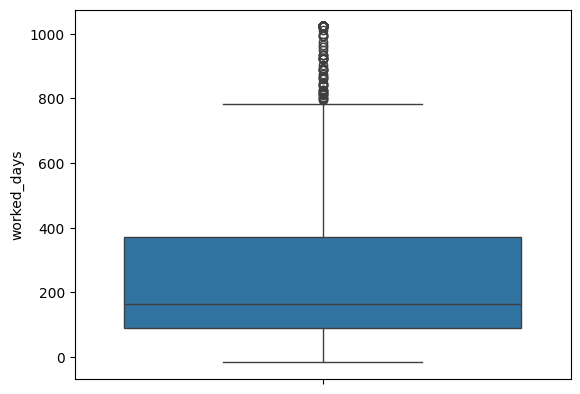

In [ ]:
sns.boxplot(data=df_copy_minus_date,y='worked_days')

In [ ]:
df_copy.head()

,Age,Gender,City,Education_Level,Income,Joining Designation,joining_season,Grade,last_rating,high_perf_low_pay,rating_std,Target,Total Business Value,Quarterly Rating,worked_days,value_gap,age_bins,income_bins,business_value_per_income,average_per_income_bins
0,28.0,0.0,C23,2,57387.0,1,Winter,1,2.0,0.0,0.000000,1,571860.0,2.0,67.0,502995.6,20-30,high,9.964975,high
1,31.0,0.0,C7,2,67016.0,2,Fall,2,1.0,0.0,0.000000,0,0.0,1.0,25.0,-80419.2,30-40,high,0.000000,negative
2,43.0,0.0,C13,2,65603.0,2,Winter,2,1.0,0.0,0.000000,1,70000.0,1.0,116.0,-8723.6,>40,high,1.067024,medium
3,29.0,0.0,C9,0,46368.0,1,Winter,1,1.0,0.0,0.000000,1,40120.0,1.0,51.0,-15521.6,20-30,mid,0.865252,low
4,31.0,1.0,C11,1,78728.0,3,Summer,3,2.0,0.0,0.547723,0,253000.0,1.6,123.0,158526.4,30-40,very_high,3.213596,medium


In [ ]:
df_copy['value_gap_bins']=pd.cut(df_copy['value_gap'],bins=(-float('inf'),-2000,2000,float('inf')),labels=('loss','neutral','high profit'))

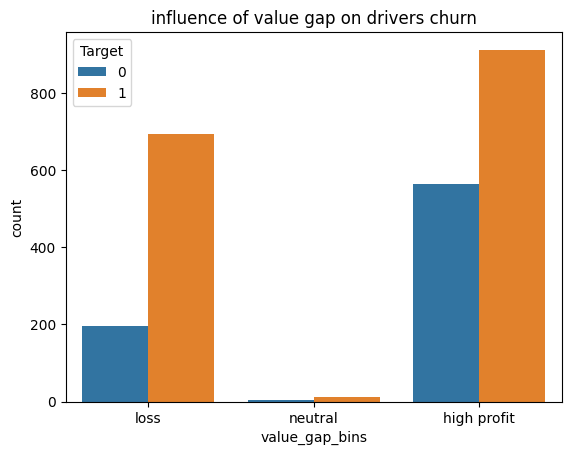

In [ ]:
sns.countplot(data=df_copy,x='value_gap_bins',hue='Target')
plt.title("influence of value gap on drivers churn")
plt.show()

observation

ratio of drivers who left to stay is high when value gap is low(means company suffers loss per driver).

ratio of drivers who left to stay is low when value gap is high(means company earns a profit per driver)

it indicates that drivers who generate high profit to company are more likely  satisfied by company financial policies and therefore less likely to leave

<Axes: ylabel='value_gap'>

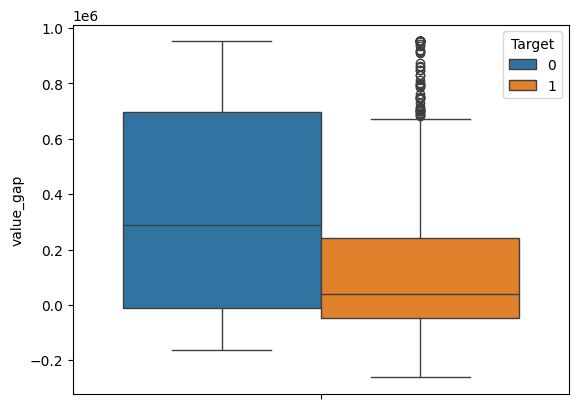

In [ ]:
sns.boxplot(data=df_copy,y='value_gap',hue='Target')

<Axes: ylabel='Quarterly Rating'>

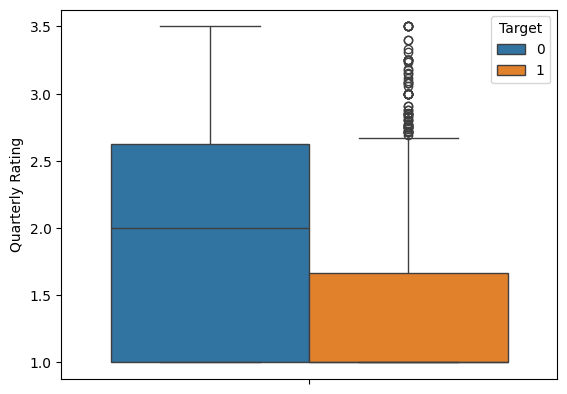

In [ ]:
sns.boxplot(data=df_copy,y='Quarterly Rating',hue='Target')

In [ ]:
num_features=df_merge.select_dtypes(include=np.number).columns
num_features

Index(['Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'last_rating', 'high_perf_low_pay', 'rating_std', 'Target',
       'Total Business Value', 'Quarterly Rating', 'worked_days', 'value_gap'],
      dtype='object')

<Axes: >

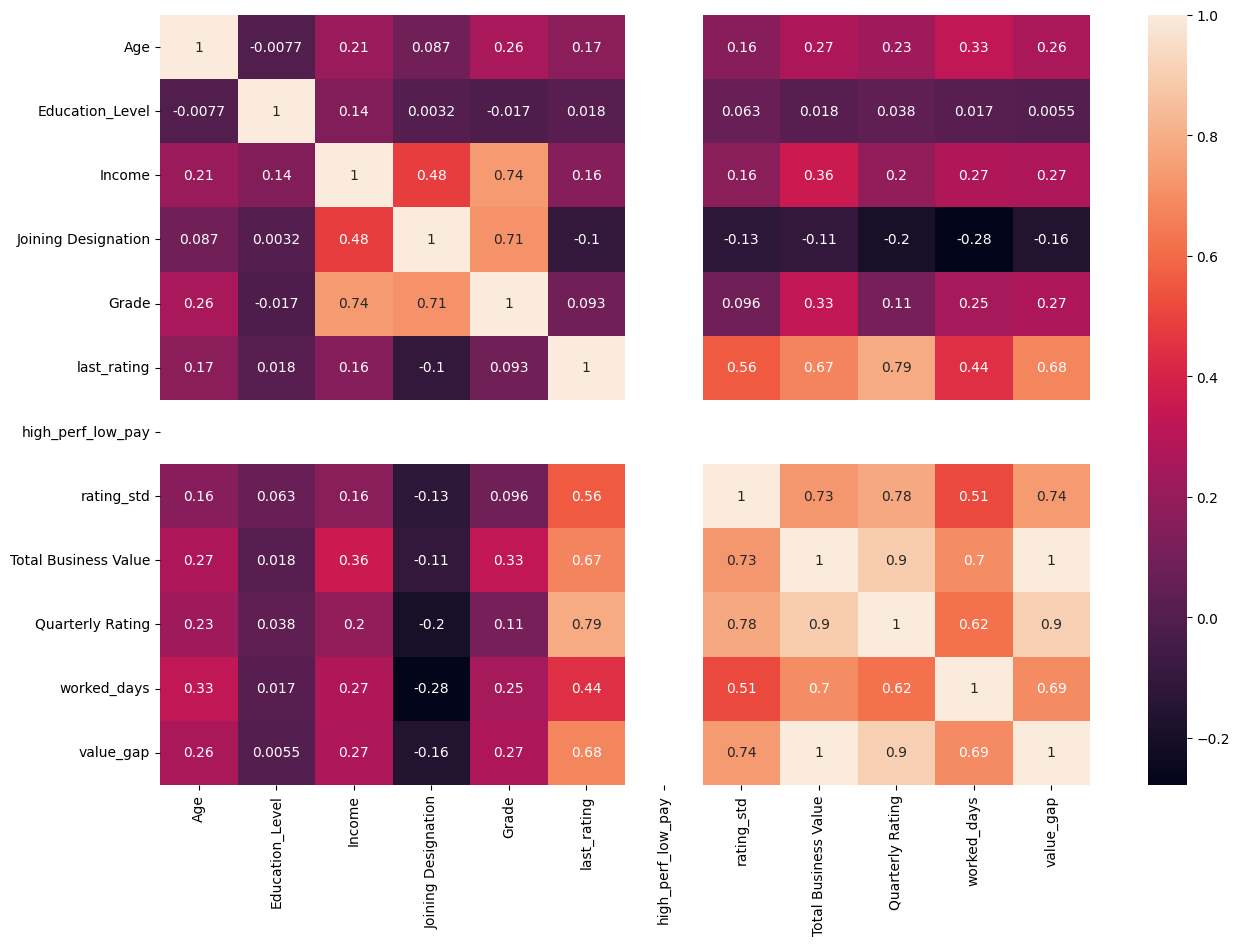

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df_merge[['Age', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'last_rating', 'high_perf_low_pay', 'rating_std',
       'Total Business Value', 'Quarterly Rating', 'worked_days', 'value_gap']].corr(),annot=True)

Observation

value_gap and Total Business value features are highly  correlated.this indicate that with increase in average business value per month,value_gap also tend to increase

(grade and income) and (grade and joining designation)are highly correlated .this indicate that high grade drivers
generally have high income and also high designation

(Quarterly_Rating and last_rating) and (rating_std and Quarterly_rating) are highly correlated .


In [ ]:
df_merge.drop(columns=['Age','high_perf_low_pay'],inplace=True,axis=1)

In [ ]:
df_merge.drop(columns='value_gap',inplace=True,axis=1)

removed age,high_perf_low_pay,value_gap features because dont help it to improve the metrics(accuracy)
also we see in eda these features are not important  

# Train test split

In [ ]:
X=df_merge.drop(columns='Target',axis=1)


In [ ]:
y=df_merge['Target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# categorical encoding

In [ ]:
!pip install category_encoders

In [ ]:
#for city column do the category encode
import category_encoders as ce
encoder=ce.TargetEncoder(cols=['City'])
x_train=encoder.fit_transform(x_train,y_train)
x_test=encoder.transform(x_test)

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
x_train['joining_season']=le.fit_transform(x_train['joining_season'])
x_test['joining_season']=le.transform(x_test['joining_season'])


we can do One hot encoding also but for random forest and Xgboost,Label encoding is preferred because tree models donot assume linear relationships

# Standardization

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
#initialise
scaler=RobustScaler()

In [ ]:
#fit on the training data
x_train_scaled=scaler.fit_transform(x_train)
x_train_scaled

array([[ 0.        ,  0.63133676, -0.5       , ..., -0.34866621,
         0.        , -0.45399597],
       [ 0.        ,  0.17819036, -0.5       , ..., -0.13430943,
         0.        , -0.18804567],
       [ 0.        ,  0.50515084, -0.5       , ..., -0.34866621,
         0.        ,  1.46138348],
       ...,
       [ 1.        ,  0.19763789,  0.        , ..., -0.16536057,
         0.        ,  0.18267293],
       [ 0.        ,  0.17819036,  0.        , ..., -0.34866621,
         0.        , -0.4916051 ],
       [ 0.        , -0.24301675,  0.5       , ..., -0.02956932,
         0.        , -0.25520484]])

In [ ]:
#use same scaler to transform test data
x_test_scaled=scaler.transform(x_test)

In [ ]:
x_train_scaled=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)

In [ ]:
x_test_scaled=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

i used minmaxscaler and standard scaler also but i get best result by robust scaler

In [ ]:
df_merge.head()

,Gender,City,Education_Level,Income,Joining Designation,joining_season,Grade,last_rating,rating_std,Target,Total Business Value,Quarterly Rating,worked_days
0,0.0,C23,2,57387.0,1,Winter,1,2.0,0.000000,1,571860.0,2.0,67.0
1,0.0,C7,2,67016.0,2,Fall,2,1.0,0.000000,0,0.0,1.0,25.0
2,0.0,C13,2,65603.0,2,Winter,2,1.0,0.000000,1,70000.0,1.0,116.0
3,0.0,C9,0,46368.0,1,Winter,1,1.0,0.000000,1,40120.0,1.0,51.0
4,1.0,C11,1,78728.0,3,Summer,3,2.0,0.547723,0,253000.0,1.6,123.0


# SMote class balancing

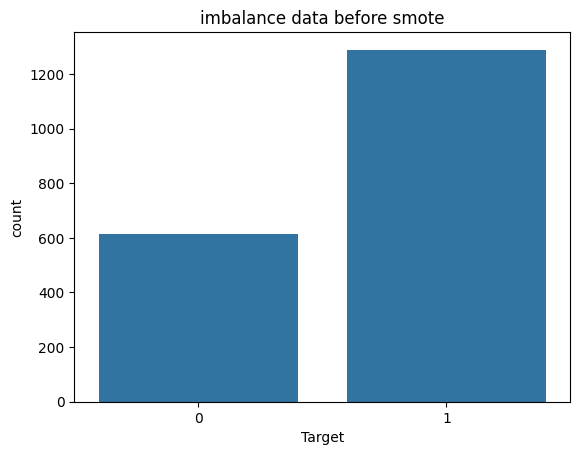

In [ ]:
#before smote
sns.countplot(x=y_train)
plt.title('imbalance data before smote')
plt.show()

In [ ]:
print(y_train.value_counts())

Target
1    1289
0     615
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE()

x_resampling,y_resampling=smote.fit_resample(x_train_scaled,y_train)


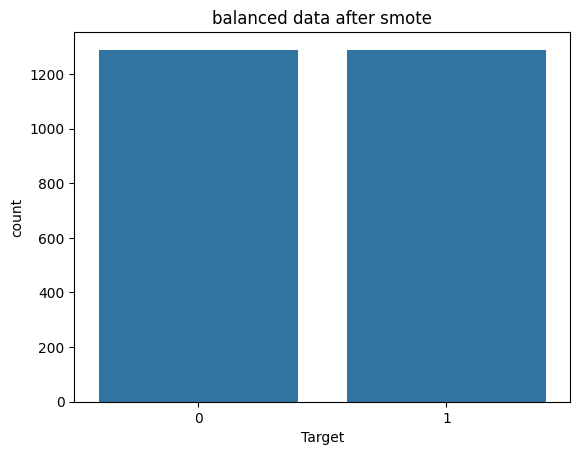

In [ ]:
#after smote
sns.countplot(x=y_resampling)
plt.title('balanced data after smote')
plt.show()

In [ ]:
print (y_resampling.value_counts())

Target
0    1289
1    1289
Name: count, dtype: int64


GRAdient bagging ensembling

# random forest

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#intialise the classifier
random_classifier=RandomForestClassifier(random_state=42)


In [ ]:
#set up the hyperparameter space for random forest
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':['sqrt','log2'],
    'bootstrap':[True,False]
}

In [ ]:
#initialize RandomizedSearchCV
randomized_classifier=RandomizedSearchCV(estimator=random_classifier,param_distributions=params,n_iter=100,cv=5,n_jobs=-1,verbose=1)

In [ ]:
#fit RandomizedSearchCV
randomized_classifier.fit(x_resampling,y_resampling)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   verbose=1)

In [ ]:
res = randomized_classifier.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False} Mean_score: 0.8716391962068186 Rank: 13
Parameters:{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False} Mean_score: 0.8759027620982917 Rank: 4
Parameters:{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True} Mean_score: 0.8541762625122299 Rank: 71
Parameters:{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True} Mean_score: 0.8561149996236923 Rank: 66
Parameters:{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False} Mean_score: 0.8662023030029351 Rank: 19
Parameters:{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2

In [ ]:
#find the best hyperparameter
print("*"*16)
print("best Hyperparamter")
print(randomized_classifier.best_params_)
print("*"*16)


****************
best Hyperparamter
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
****************


In [ ]:
#best model with best hyperparamter
best_randomized_classifier=randomized_classifier.best_estimator_
best_randomized_classifier

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

In [ ]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(best_randomized_classifier,x_resampling,y_resampling,cv=kf,scoring='accuracy')
print('cross-validated scores',scores)
print('Mean accuracy',np.mean(scores))

cross-validated scores [0.88372093 0.87596899 0.86627907 0.89902913 0.88349515]
Mean accuracy 0.8816986528185444


In [ ]:
#fit the best estimator on training data
best_randomized_classifier.fit(x_resampling,y_resampling)

#evaluate on test data
y_pred_test=best_randomized_classifier.predict(x_test_scaled)

#evaluate on test data
y_pred_train=best_randomized_classifier.predict(x_resampling)

# find the model accuracy
acc_scoree_train=accuracy_score(y_pred_train,y_resampling)
print(f"traing_data_accuracy_score,:{acc_scoree_train}")
acc_scoree_test=accuracy_score(y_pred_test,y_test)
print(f"test_data_accuracy_score,:{acc_scoree_test}")

traing_data_accuracy_score,:1.0
test_data_accuracy_score,:0.8092243186582809


In [ ]:
y_predict_proba=best_randomized_classifier.predict_proba(x_test_scaled)[:,1]

feature importance

In [ ]:
#feature importances
indices=np.argsort(best_randomized_classifier.feature_importances_)[::-1]
columns_name=x_train.columns
feature_importances_rank = columns_name[indices]
values_ranking=np.sort(best_randomized_classifier.feature_importances_)[::-1]
values_ranking

array([0.21230039, 0.1304835 , 0.11688839, 0.09292993, 0.09235263,
       0.08932537, 0.07864546, 0.0602825 , 0.03862862, 0.03811177,
       0.0326098 , 0.01744163])

In [ ]:
feature_importances_dataframe=pd.DataFrame({'features_names':feature_importances_rank,'values':values_ranking})
feature_importances_dataframe

,features_names,values
0,worked_days,0.212300
1,last_rating,0.130483
2,Total Business Value,0.116888
3,Income,0.092930
4,Quarterly Rating,0.092353
5,City,0.089325
6,joining_season,0.078645
7,rating_std,0.060283
8,Education_Level,0.038629
9,Joining Designation,0.038112


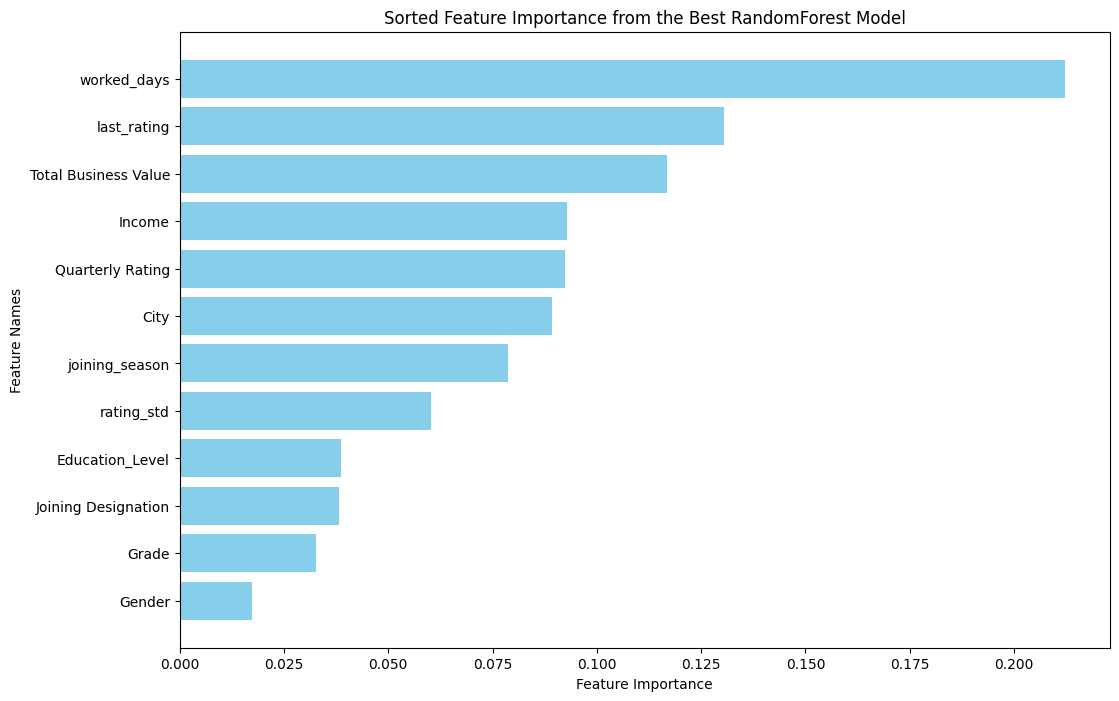

In [ ]:
# TODO: Plot all feature importances sorted
plt.figure(figsize=(12, 8))
plt.barh(range(len(values_ranking)),values_ranking, align='center', color='skyblue')
plt.yticks(range(len(values_ranking)), feature_importances_rank)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Sorted Feature Importance from the Best RandomForest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()

observations

top 5 features

1)worked days-drivers with fewer active days are likely to leave

2)last ratings-low ratings may signal dissatisfiation or customer complaints

3) Total business value=lower earnings could demotivate drivers

4)income-declining income correlates with nchurn risk

5)city-attrition varies by location.perhaps due to regional market conditions or competition

In [ ]:
acc_scoree_train

1.0

In [ ]:
acc_scoree_test

0.8092243186582809

In [ ]:
from sklearn.metrics import precision_recall_curve,precision_score,recall_score,roc_auc_score,accuracy_score,f1_score

In [ ]:
print('*'*60)
print(f'precision_score : {precision_score(y_test,y_pred_test)} ')
print(f'recall_score    : {recall_score(y_test,y_pred_test)} ')
print(f'f1_score        : {f1_score(y_test,y_pred_test)} ')
print(f'accuracy score  : {accuracy_score(y_test,y_pred_test)} ')
print(f'roc auc score   : {roc_auc_score(y_test,y_predict_proba)} ')
print('*'*60)

************************************************************
precision_score : 0.8511904761904762 
recall_score    : 0.8746177370030581 
f1_score        : 0.8627450980392157 
accuracy score  : 0.8092243186582809 
roc auc score   : 0.879164118246687 
************************************************************


observation

precision 0.86 means model is good at avoiding false positive(type 1 error)

recall 0.871 means model is good at fairly avoiding false negatives

f1score of 0.862 indicates a good balance between precision and recall



# Classification report ,confusion matrix and auc_roc curve  of random forest model

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred_test,target_names=['stayed','leave']))

              precision    recall  f1-score   support

      stayed       0.71      0.67      0.69       150
       leave       0.85      0.87      0.86       327

    accuracy                           0.81       477
   macro avg       0.78      0.77      0.78       477
weighted avg       0.81      0.81      0.81       477



Observation

1)precision for leave is 0.85 means 85% of predicted leaves were actual leavers

recall for leave is 0.87 means 87% of true leaves were correctly predicted

f1-score for leave 0.86 means model performed in a balanced way


2)for stayed model performed decent

precision score for stayed is 0.69

recall score for stayed is 0.69

f1_score for stayed is 0.69

decent performance for class 0(stayed)


In [ ]:
from sklearn.metrics import confusion_matrix

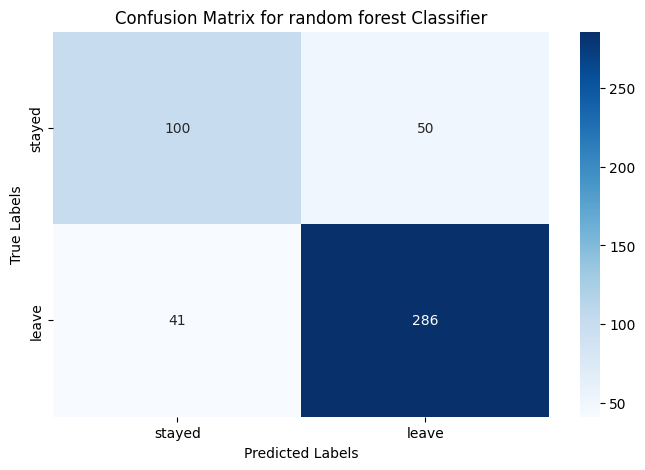

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)  # TODO: Provide the correct variables to generate the confusion matrix.
categories = ['stayed','leave']

# Plotting the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for random forest Classifier')
plt.show()

observation

our goal is churn prediction this is very good model for catching the drivers who are likely to leave .

it shows a good trade-off between sensitivity and specificity

In [ ]:
from sklearn.metrics import roc_curve,auc

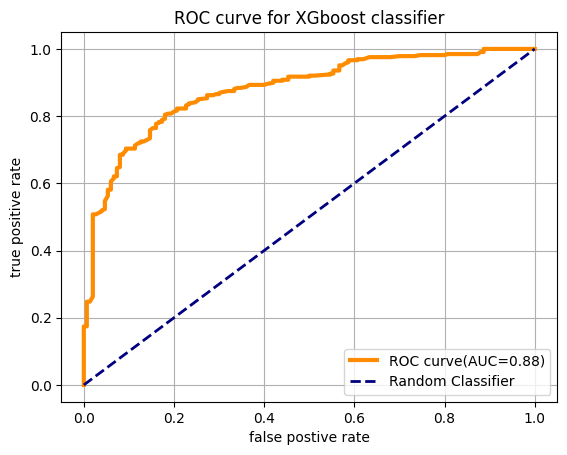

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_predict_proba)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,color='darkorange',lw=3,label=f'ROC curve(AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--',label=f'Random Classifier')
plt.xlabel('false postive rate')
plt.ylabel('true positive rate')
plt.title("ROC curve for XGboost classifier")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

observation

an auc of 0.88 means model has strong discriminative ability

the curve is well above the diagonal line.orange curve lies far above the blue dashed diagonal(which represents a random classifier) this shows the model does a good job separating the leave from stayed cases across different threshold

high true positive rate at low false positive .the curve rises steeply in the beginning means even at a low false positive rates model are correctly identifying many actual leavers

this model is efficient in catching churners early on with few mistakes





In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test,y_predict_proba)

np.float64(0.879164118246687)

ensemble Boosting algorithm

# XGBoost

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#hperparameters for tuning
params_distributions={'n_estimators':[100,200,300],
             'learning_rate':[0.01,0.05,0.1,0.2],
             'max_depth':[3,5,7,10],
             'subsample':[0.7,0.8,0.9],
             'colsample_bytree':[0.7,0.8,0.9],
             'gamma':[0,0.1,0.3],
             'reg_alpha':[0,0.1,0.5],
             'reg_lambda':[1,1.5,2]}

In [ ]:
#Initialise the xgb classifier
xgb_classifier=XGBClassifier(random_state=40)

In [ ]:
#initialise thye randomizedsearchcv to find the best paramwters and models
grid_search=RandomizedSearchCV(estimator=xgb_classifier,param_distributions=params_distributions,n_iter=100,cv=5,n_jobs=-1)


grid_search.fit(x_resampling,y_resampling)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.7, 0.8, 0.9]})

In [ ]:
#best paramaters after tuning
grid_search.best_params_

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 0.5,
 'n_estimators': 200,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.9}

In [ ]:
#best model after tuning
best_grid_classifier=grid_search.best_estimator_
best_grid_classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#fit the training data on best model
best_grid_classifier.fit(x_resampling,y_resampling)

#prediction on test data
y_pred_test=best_grid_classifier.predict(x_test_scaled)

#prediction on training data
y_pred_train=best_grid_classifier.predict(x_resampling)

#accuracy on training data
acc_scoree_train=accuracy_score(y_pred_train,y_resampling)

#accuracy on test data
acc_scoree_test=accuracy_score(y_pred_test,y_test)

In [ ]:
#probability of class 1 of every sample
y_predict_proba_xg=best_grid_classifier.predict_proba(x_test_scaled)[:,1]

In [ ]:
acc_scoree_train

0.9980605120248255

In [ ]:
acc_scoree_test

0.8238993710691824

In [ ]:
#feature importances
indices=np.argsort(best_grid_classifier.feature_importances_)[::-1]
columns_name=x_train.columns
feature_importances_rank = columns_name[indices]
values_ranking=np.sort(best_grid_classifier.feature_importances_)[::-1]
values_ranking

array([0.44582486, 0.07991931, 0.07899567, 0.06735364, 0.06384543,
       0.05166092, 0.0500474 , 0.04940813, 0.03154753, 0.02931412,
       0.0290815 , 0.02300153], dtype=float32)

In [ ]:
feature_importances_dataframe=pd.DataFrame({'features_names':feature_importances_rank,'values':values_ranking})
feature_importances_dataframe

,features_names,values
0,last_rating,0.445825
1,Joining Designation,0.079919
2,joining_season,0.078996
3,worked_days,0.067354
4,Education_Level,0.063845
5,Grade,0.051661
6,Quarterly Rating,0.050047
7,Total Business Value,0.049408
8,rating_std,0.031548
9,City,0.029314


observation



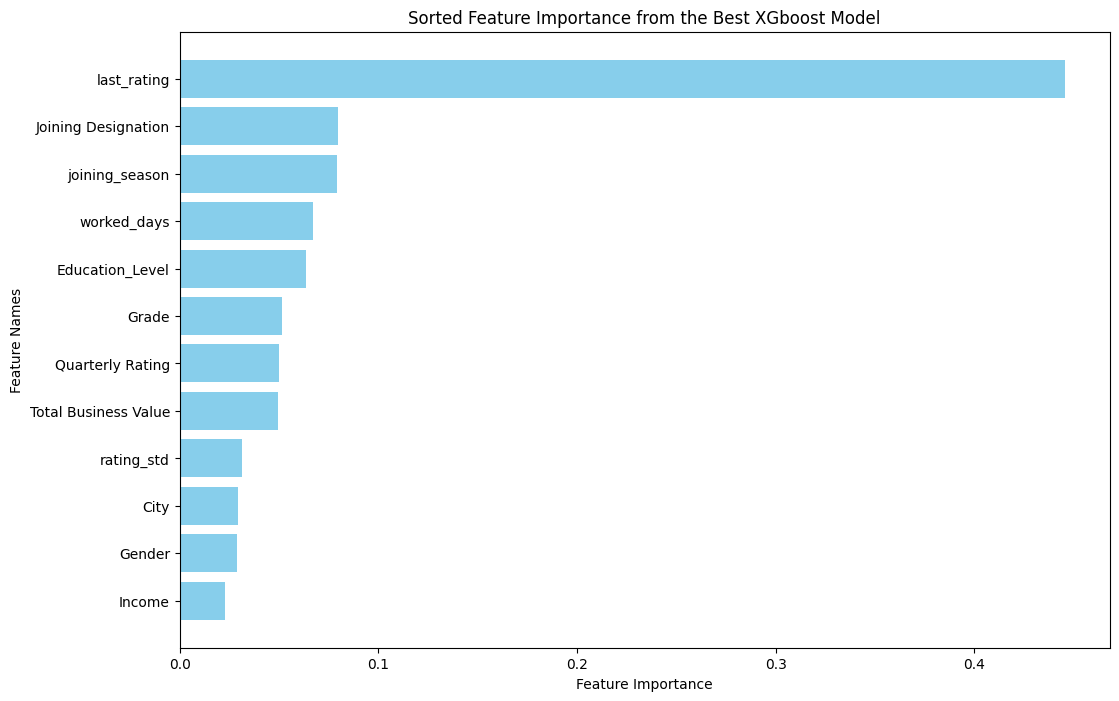

In [ ]:
# TODO: Plot all feature importances sorted
plt.figure(figsize=(12, 8))
plt.barh(range(len(values_ranking)),values_ranking, align='center', color='skyblue')
plt.yticks(range(len(values_ranking)), feature_importances_rank)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Sorted Feature Importance from the Best XGboost Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()

Observation

1)last ratings-low ratings may signal dissatisfication or customer complaints

2)joining season-drivers joining season plays an important role in churn

3)joining designation - drivers joining designation plays an important part in churn

4)worked days- drivers with fewer active days are more likely to leave


5)quarterly ratings-drivers with low quarterly ratings are likely to leave

6)Grade-drivers with high grades are likely to stayed

model evaluation

In [ ]:
print('*'*60)
print(f'precision_score : {precision_score(y_test,y_pred_test)} ')
print(f'recall_score    : {recall_score(y_test,y_pred_test)} ')
print(f'f1_score        : {f1_score(y_test,y_pred_test)} ')
print(f'accuracy score  : {accuracy_score(y_test,y_pred_test)} ')
print(f'roc auc score   : {roc_auc_score(y_test,y_predict_proba_xg)} ')
print('*'*60)

************************************************************
precision_score : 0.8648648648648649 
recall_score    : 0.8807339449541285 
f1_score        : 0.8727272727272727 
accuracy score  : 0.8238993710691824 
roc auc score   : 0.9031804281345566 
************************************************************


observation

precision 0.867 means model is good at avoiding false positive(type 1 error)

recall 0.89 means model is good at fairly avoiding false negatives

f1score of 0.889 indicates a good balance between precision and recall

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       150
           1       0.86      0.88      0.87       327

    accuracy                           0.82       477
   macro avg       0.80      0.79      0.79       477
weighted avg       0.82      0.82      0.82       477



Observation

1)precision for leave is 0.87 means 87% of predicted leaves were actual leavers

recall for leave is 0.9 means 90% of true leaves were correctly predicted

f1-score for leave 0.89 means model performed in a balanced way

2)for stayed model performed decent

precision score for stayed is 0.76

recall score for stayed is 0.70

fi_score for stayed is 0.73

decent performance for class 0(stayed)

In [ ]:
confusion_matrix(y_test,y_pred_test)

array([[105,  45],
       [ 39, 288]])

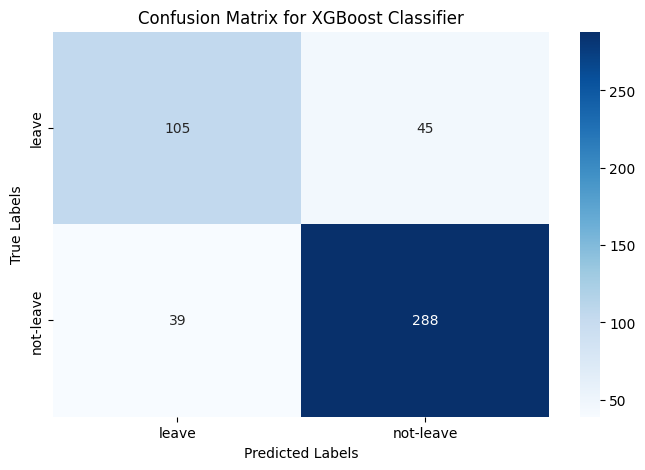

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)  # TODO: Provide the correct variables to generate the confusion matrix.
categories = ['leave','not-leave']

# Plotting the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

observation

our goal is churn prediction this is very good model for catching the drivers who are likely to leave .

it shows a good trade-off between sensitivity and specificity

In [ ]:
from sklearn.metrics import auc

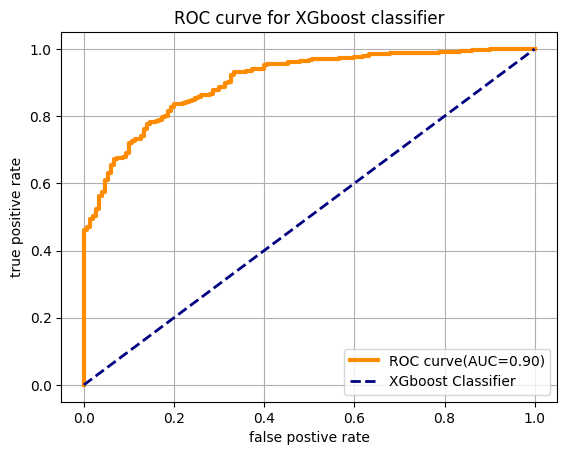

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test,y_predict_proba_xg)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,color='darkorange',lw=3,label=f'ROC curve(AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--',label=f'XGboost Classifier')
plt.xlabel('false postive rate')
plt.ylabel('true positive rate')
plt.title("ROC curve for XGboost classifier")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

observation

an auc of 0.90 means model has strong discriminative ability

the curve is well above the diagonal line.orange curve lies far above the blue dashed diagonal(which represents a random classifier) this shows the model does a good job separating the leave from stayed cases across different threshold

high true positive rate at low false positive .the curve rises steeply in the beginning means even at a low false positive rates model are correctly identifying many actual leavers

this model is efficient in catching churners early on with few mistakes

# Business insights and recommendation

1)Common features out of top 5 features are *worked days* and *last rating*s.drivers with fewer active days are more likely to leave

2)Both models can successfully predict at-risk drivers especially using behavorial and performance data

3)Lower average business value per month per driver are also clear churn triggers

4).58.9% drivers are males and 41.0% drivers are female.Gender features seems not impact on the decision of churn.ratio of leave to stayed is same in both the cases

5)62.5% drivers give profit to the company and 37.5% incur loss to the company

6)from EDA,age and education level seems like dont impact much on the churn .but income,grade,joining designation,average business value per month per driver,value gap impact directly on churn.ratio of leave to stayed is high to low
(income,grade,joining designation,average business value per month per driver,value gap).company should give attention on these features

7)joining season improved the model ability to distinguish between drivers who leave and those who stay .this feature added clear separability that the model leveraged for better predictions







recommendations

1)use the model monthly to flag at risk drivers and trigger retention efforts(calls,incentives,support)

2)offer bonuses or business growth plans for drivers with reduced activity ,declining income,recent poor ratings

3)dig deeper into cities with higher churn to tailor regional engagement or pricing strategies

4)follow up with low-rated drivers-offer training,feedback or grievances resolution

5)regularly retain the model with new data(monthly or quartely) especially as market dynamics changes

6)ola should track seasonal trends more closely when hiring and onboarding drivers and tailor retention strategies based on seasonality